Messaufgaben:
• Die Genauigkeit eines Messdatenerfassungssystems hängt in hohem Maße von der Anzahl
von Bits ab, mit denen das analoge Eingangssignal dargestellt wird. Die Genauigkeit der ADWandlung mit n Bit ist das Verhältnis von einem LSB zur Gesamtzahl der darstellbaren Bits
Genauigkeit =
1
2
n
.
Die Genauigkeit in Volt (der theoretische Quantisierungsfehler) ergibt sich aus der minimalen
und maximalen Eingangsspannung Umin bzw. Umax als
∆U =
Umax − Umin
2
n
.
Berechnen Sie den theoretischen Quantisierungsfehler des 11-Bit-AD-Wandlers (−10 V . . . 10 V ).


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
Umax = 10
Umin = -10
n = 11
deltaU = (Umax - Umin) / 2**n
print("Quantisierungsfehler: " + str(deltaU * 1e3) + "mV")

Quantisierungsfehler: 4.39453125mV


• Variieren Sie die Spannung einer Gleichspannungsquelle von 1−10V in Schritten von 1V . Messen Sie die Spannung mit dem hochgenauen Feinmessgerät Keithley TRMS 179, dem analogen
Multimeter Philips PM 2503 und mit dem AD-Wandler und tragen die Werte in eine Tabelle
ein.
• Berechnen Sie für jeden Tabelleneintrag den Messfehler ei = Ui,ref −Ui für das Multimeter und
den AD-Wandler, wobei die Werte des Feinmessgeräts als Referenz Ui,ref genommen werden.
Bestimmen Sie daraus die Standardabweichungen der beiden Geräte als Genauigkeitsmaß
S =
vuut
1
n − 1
Xn
i=1
e
2
i =
vuut
1
n − 1
Xn
i=1
(Ui,ref − Ui)
2,
wobei n die Anzahl der Messwerte ist. Diskutieren Sie die Ergebnisse.

In [19]:
data = np.genfromtxt("messung_a2.txt", delimiter=';', skip_header=1, usecols=())
data.shape
spannung = data[:, 0]
feinmessgeraet = data[:, 1]
multimeter = data[:, 2]
adwandler = data[:, 3]
picoscope = data[:, 4]

messfehler_multimeter = feinmessgeraet - multimeter
messfehler_adwandler = feinmessgeraet - adwandler
messfehler_picoscope = feinmessgeraet - picoscope

faktor = 1 / 9
std_multimeter = np.sqrt(faktor * np.sum(messfehler_multimeter**2))
std_adwandler = np.sqrt(faktor * np.sum(messfehler_adwandler**2))
std_picoscope = np.sqrt(faktor * np.sum(messfehler_picoscope**2))

print("Std von Multimeter: " + str(std_multimeter * 1e3) + "mV")
print("Std von A/D-Wandler: " + str(std_adwandler * 1e3) + "mV")
print("Std von Picoscope: " + str(std_picoscope * 1e3) + "mV")

Std von Multimeter: 3.0000000000000973mV
Std von A/D-Wandler: 7.8469224300524845mV
Std von Picoscope: 23.75102336976485mV


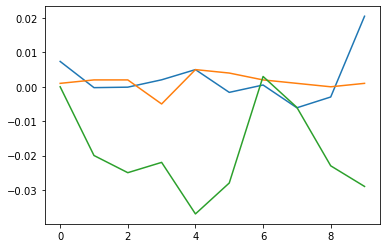

In [18]:
plt.plot(messfehler_adwandler)
plt.plot(messfehler_multimeter)
plt.plot(messfehler_picoscope)